# Perceptron in Numpy for Linear Regression

In this notebook, we will use a perceptron to perform a well-known linear regression task without using any specific Machine Learning library, i.e., using only *Numpy*.

In [1]:
# Importing the necessary libraries
import numpy as np  
import matplotlib.pyplot as plt  

## Generating the data

To generate the data, take the line $y = Ax + B = 0.5x$, where we take the data $x \in \{0, 0.25, 0.5, 0.75, 1\}$.

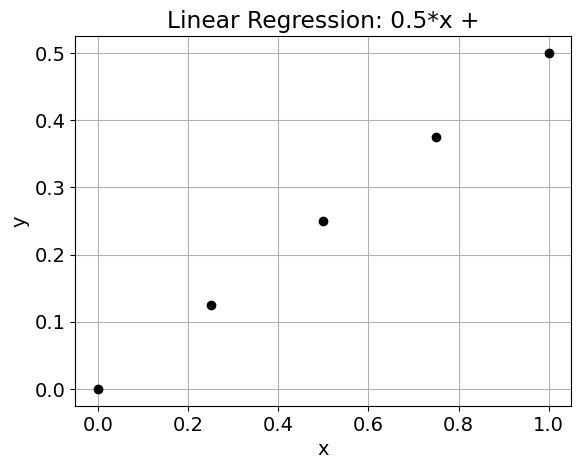

In [2]:
x = np.linspace(0,1,5)    # input
y = 0.5*x # target

plt.rcParams.update({'font.size': 14})  # Increase font size

plt.title("Linear Regression: 0.5*x +")
plt.plot(x,y,"ko")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Perceptron Initialization
Let's randomly generate the initial weights and bias for our perceptron.

In [3]:
# To always generate the same random numbers
np.random.seed(42)

w = np.random.randn(1) 
b    = np.random.randn(1)
print(" Valores do pesos:",w,"\n Valores do bias:",b)

 Valores do pesos: [0.49671415] 
 Valores do bias: [-0.1382643]


Defining the activation function
* Here we will only use the `ReLU` and `dReLU` functions as non-linear activation functions, defined below.

In [4]:
def Relu(x):
    return x * (x > 0)

def dReLU(x):
    return 1. * (x > 0)

Let's visualize the output of the neural network with randomly initialized weights. We define the perceptron error, i.e., our cost function, as $||y_t - y_0||^2$, where $y_t$ is our target $y$ and $y_0$ is our generated $y$ for each $x$.

In [5]:
y_0 = [np.array(Relu(np.dot(w,i) + b ))  for i in x ]
y_0 = np.array(y_0).reshape(len(y))
print(" Perceptron error:", np.sum((y_0 - y)**2))

 Perceptron error: 0.07504003913718715


Visualization

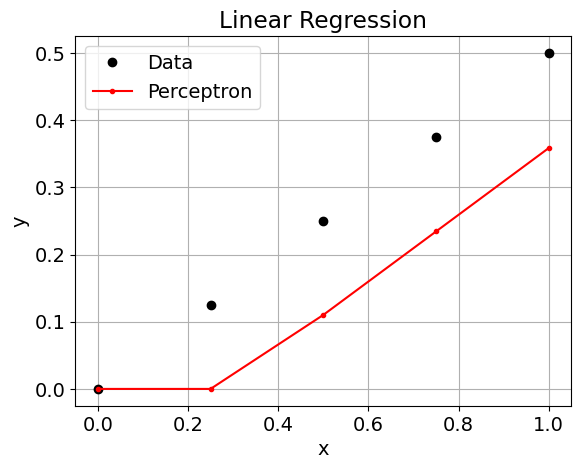

In [6]:
plt.title("Linear Regression")
plt.plot(x, y, "ko", label="Data")
plt.plot(x, y_0, "r.-", label="Perceptron")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

See the values found for $w,b$

In [7]:
w,b

(array([0.49671415]), array([-0.1382643]))

Now the values of the inner product $w\cdot x_i$, for each $i$

In [8]:
w*x

array([0.        , 0.12417854, 0.24835708, 0.37253561, 0.49671415])

Added to the value of $b$, these are the arguments of the perceptron's activation function.

In [9]:
w*x + b

array([-0.1382643 , -0.01408576,  0.11009278,  0.23427131,  0.35844985])

Thus, $f(w*x + b)$, assumes the values

In [10]:
Relu(w*x + b)

array([-0.        , -0.        ,  0.11009278,  0.23427131,  0.35844985])

Remember that the ReLU function is zero whenever $w*x + b\leq0$.

The difference with the training values are

In [11]:
y - Relu(w*x + b)

array([0.        , 0.125     , 0.13990722, 0.14072869, 0.14155015])

Thus, if for the data $x^{(i)}$ we have the output $y_0^{(i)}$, the cost function, $\mathcal{L}(y^{(i)},y_0^{(i)}) = ||y^{(i)}-y_0^{(i)}||^2$, assumes the values

In [12]:
(y - Relu(w*x + b))**2

array([0.        , 0.015625  , 0.01957403, 0.01980456, 0.02003644])

Adding over the data-set
$\mathcal{L}(y,y_0) = \sum_i\mathcal{L}(y^{(i)},y_{0}^{(i)}) =\sum_i||y^{(i)}-y_0^{(i)}||^2$

In [13]:
loss_value = np.sum(y - Relu(w*x + b))**2

print("Perceptron error without training: ", loss_value)

Perceptron error without training:  0.299412583424719


## Training the Perceptron

Now we will update the weights and bias according to the rule
$w_{n+1} = w_n + 2*\eta*\mathcal{L}*f'*x_i$
$b_{n+1} = b_n + 2*\eta*\mathcal{L}*f'$

Where $f'$ in this case is the derivative of `ReLU`, which here assumes value: $0$, if $w*x+b\leq0$, and $1$ otherwise.

In [14]:
#To always generate the same random numbers

print(" Initial weight:",w,"Initial bias:",b)
eta = 0.05
Loss = 0

w_new = 0
b_new = 0
for index in range(len(x)):
    x_j = x[index]  # Input
    y_j = y[index]  # Target

    linear  = np.dot(w,x_j) + b 
    y_output = Relu(linear)  # Perceptron
    loss    = y_j - y_output

    w_new  +=  2*eta*loss*dReLU(linear)*x_j
    b_new  +=  2*eta*loss*dReLU(linear)
    Loss += loss**2
w += w_new
b += b_new
print(" New weight:",w,"new bias:",b)
print("\n Perceptron error:",Loss[-1])

 Initial weight: [0.49671415] Initial bias: [-0.1382643]
 New weight: [0.52841918] new bias: [-0.0960457]

 Perceptron error: 0.07504003913718715


Note that the error is now smaller due to the weight update.

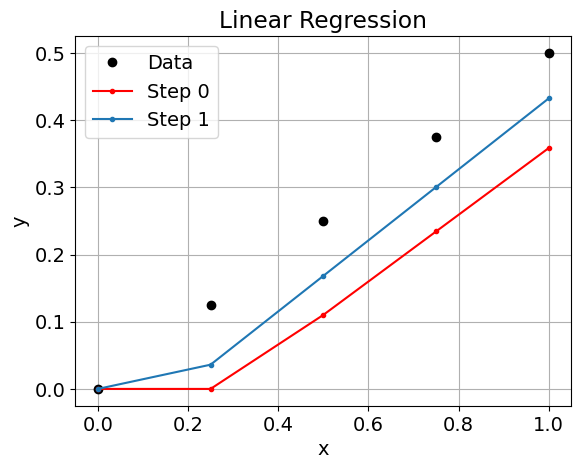

In [15]:
y_1 = []
for i in x:
    y_1.append( Relu(np.dot(w,i) + b ))
    
plt.title("Linear Regression")
plt.plot(x,y,"ko",label="Data")
plt.plot(x,y_0,"r.-",label="Step 0")
plt.plot(x,y_1,".-",label="Step 1")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let's repeat the training process for a few more steps

 Initial weight: [0.52841918] Initial bias: [-0.0960457]
 New weight: [0.54192949] new bias: [-0.07091598]

 Perceptron error: [0.01733063]


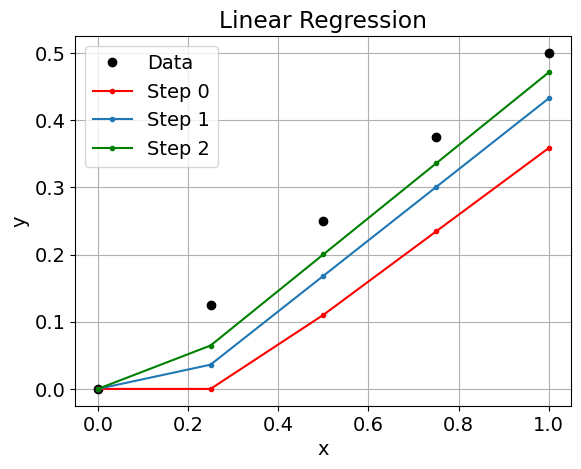

In [16]:
print(" Initial weight:", w, "Initial bias:", b)
eta = 0.05
Loss = 0
for index in range(len(x)):
    x_j = x[index]  # Input
    y_j = y[index]  # Target

    linear  = np.dot(w, x_j) + b 
    y_output = Relu(linear)  # Perceptron
    loss    = y_j - y_output

    w   +=  2*eta*loss*dReLU(linear)*x_j
    b   +=  2*eta*loss*dReLU(linear)
    
    Loss += loss**2
print(" New weight:", w, "new bias:", b)
print("\n Perceptron error:", Loss)

y_2 = []
for i in x:
    y_2.append(Relu(np.dot(w, i) + b))
    
plt.title("Linear Regression")
plt.plot(x, y, "ko", label="Data")

plt.plot(x, y_0, "r.-", label="Step 0")
plt.plot(x, y_1, ".-", label="Step 1")
plt.plot(x, y_2, "g.-", label="Step 2")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

Let's repeat 100 times

 Initial weight: [0.54192949] Initial bias: [-0.07091598]
 New weight: [0.50554908] new bias: [-0.00396825]

 Perceptron error: 1.2154198713965942e-05


C:\Users\Gubio\AppData\Local\Temp\ipykernel_1680\2112080083.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Loss[j] += loss**2


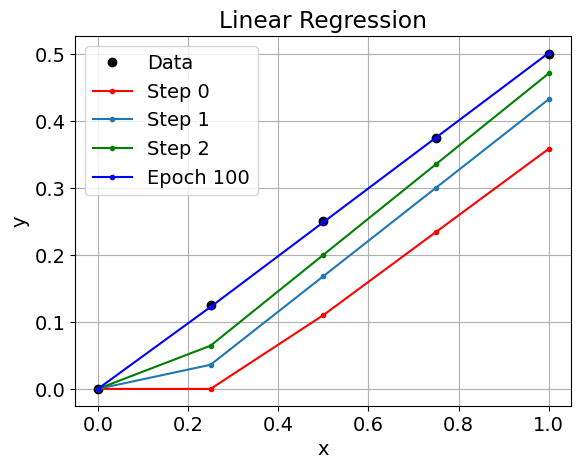

In [17]:
print(" Initial weight:", w, "Initial bias:", b)
epochs = 100
eta = 0.05
Loss = np.zeros(epochs)
for j in range(epochs):
    for index in range(len(x)):
        x_j = x[index]  # Input
        y_j = y[index]  # Target

        linear  = np.dot(w, x_j) + b 
        y_output = Relu(linear)  # Perceptron
        loss    = y_j - y_output

        w   +=  2*eta*loss*dReLU(linear)*x_j
        b   +=  2*eta*loss*dReLU(linear)
        
        Loss[j] += loss**2

    y_output_epoch = []
    for i in x:
        y_output_epoch.append(Relu(np.dot(w, i) + b))

print(" New weight:", w, "new bias:", b)
print("\n Perceptron error:", Loss[-1])    

plt.title("Linear Regression")
plt.plot(x, y, "ko", label="Data")
plt.plot(x, y_0, "r.-", label="Step 0")
plt.plot(x, y_1, ".-", label="Step 1")
plt.plot(x, y_2, "g.-", label="Step 2")
plt.plot(x, y_output_epoch, "b.-", label="Epoch 100")
plt.grid(True)
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()
